In [1]:
import os

import cv2

from matplotlib import pyplot as plt

from face_anonymizer.core.detection import FaceDetector
from face_anonymizer.core.detection import FaceExtractor
from face_anonymizer.core.manipulation import Drawing
from face_anonymizer.core.manipulation import Manipulator

from face_anonymizer.core import pixelate_faces_from_path
from face_anonymizer.core import pixelate_faces
from face_anonymizer.video import pixelate_faces_from_path as pixelate_faces_from_path_video

In [2]:
PROJECT_ROOT_PATH = os.getcwd()

MODEL_FILE_PATH = os.path.join(PROJECT_ROOT_PATH, "data", "res10_300x300_ssd_iter_140000_fp16.caffemodel")
CONFIG_FILE_PATH = os.path.join(PROJECT_ROOT_PATH, "data", "deploy.prototxt")
THRESHOLD = 0.50

TEST_IMAGE = os.path.join(PROJECT_ROOT_PATH, "sample", "dream-team-1992.jpg")
TEST_VIDEO = os.path.join(PROJECT_ROOT_PATH, "sample", "sports-movie-speeches-cut.mp4")

OUTPUT_VIDEO_PATH = "pixelated.mp4"

In [3]:
def show_image(image, title="test image"):
    plt.figure(figsize=(20, 20))
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [4]:
detector = FaceDetector(MODEL_FILE_PATH, CONFIG_FILE_PATH)

In [5]:
image_path = TEST_IMAGE

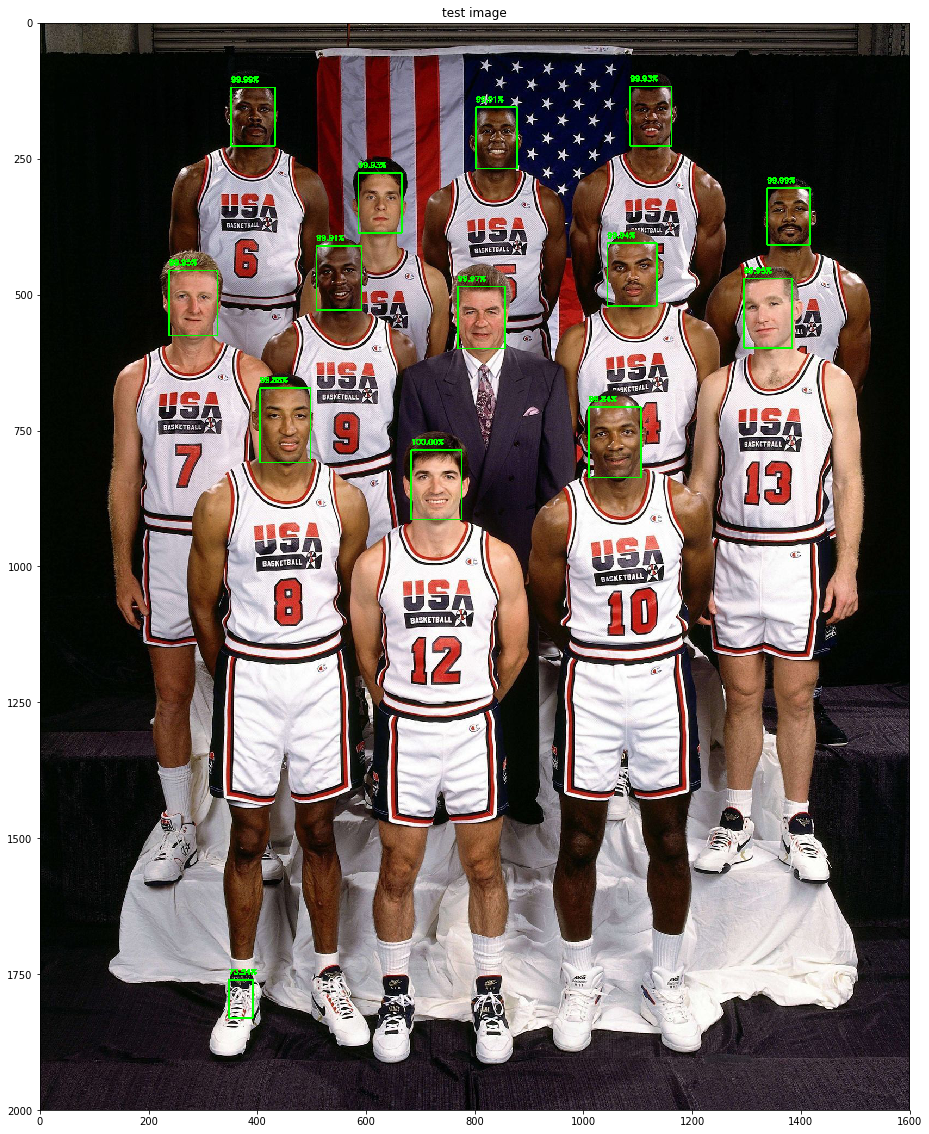

In [6]:
# Face Detection on Image

image, bboxes = detector.detect_from_path(image_path, threshold=THRESHOLD)
bboxes = list(bboxes)

image_with_bboxes = Drawing.bounding_boxes(image, *bboxes)

show_image(image_with_bboxes)

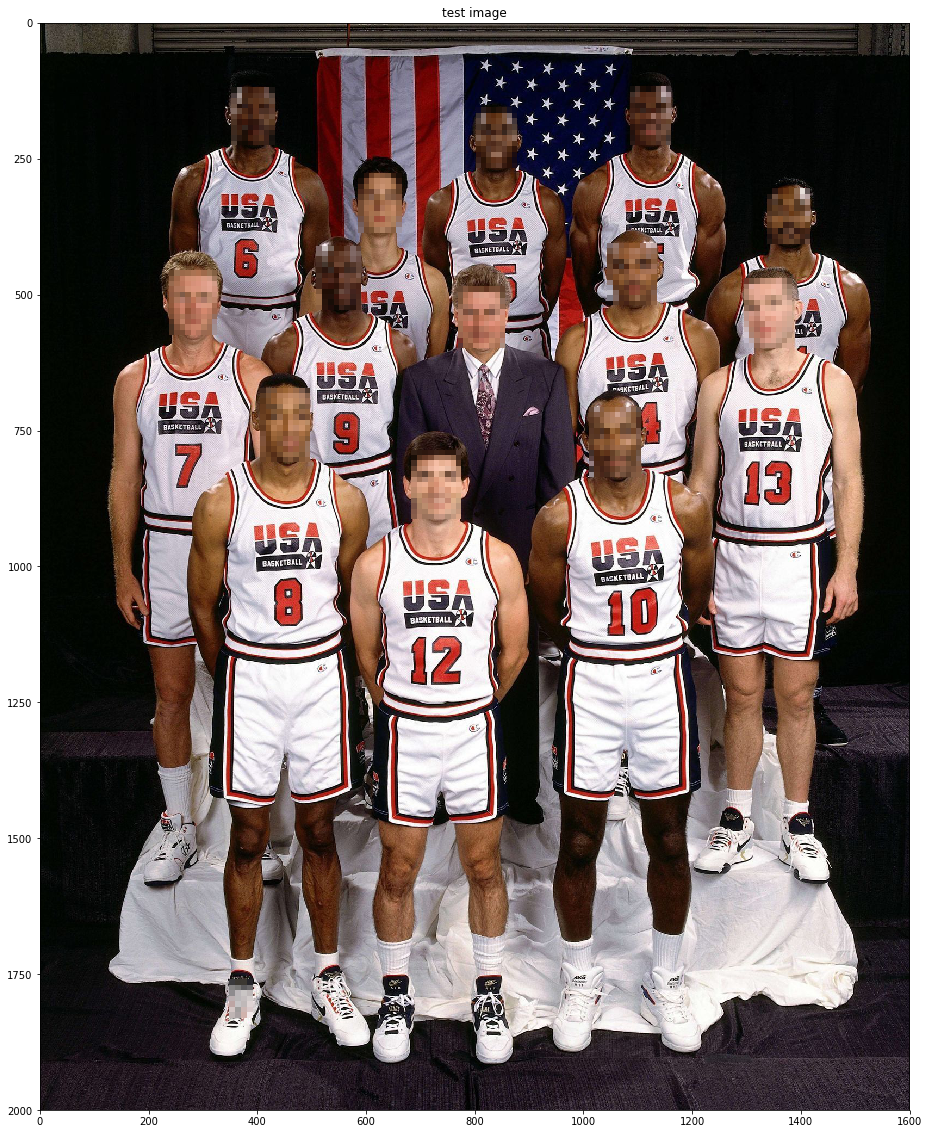

In [7]:
# Face Pixelation on Image

pixelated = pixelate_faces_from_path(detector, image_path, detection_threshold=THRESHOLD)

show_image(pixelated)

In [8]:
detector.reinit()
pixelate_faces_from_path_video(detector, TEST_VIDEO, OUTPUT_VIDEO_PATH, detection_threshold=THRESHOLD)

Elaborated 5 seconds
Elaborated 10 seconds
Elaborated 15 seconds
Elaborated 20 seconds
Elaborated 25 seconds
Elaborated 30 seconds
Finished


In [10]:
from IPython.display import HTML

src = OUTPUT_VIDEO_PATH
HTML(f"""
<div align="middle">
<video width="80%" controls>
      <source src="{src}" type="video/mp4">
</video></div>""")